# Housing Days On Market - Data Inspection and Cleaning

## Information

Housing related data sources were combined in the project SQLite database. The output CSV file is analyzed here. 

### Environment Information:

Environment used for coding is as follow:

Oracle VM VirtualBox running Ubuntu (guest) on Windows 10 (host).

Current conda install:

               platform : linux-64
          conda version : 4.2.13
       conda is private : False
      conda-env version : 4.2.13
    conda-build version : 1.20.0
         python version : 2.7.11.final.0
       requests version : 2.9.1
       default environment : /home/jonathan/anaconda2/envs/py35
       
       Python 3.5.2 :: Anaconda 4.1.1 (64-bit)

Package requirements:

dill : 0.2.5, numpy : 1.11.3, pandas : 0.18.1, matplotlib : 1.5.1, scipy : 0.18.1, seaborn : 0.7.1, scikit-image : 0.12.3, scikit-learn : 0.18.1


## Python Package(s) Used

In [1]:
import datetime as dt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import skew, skewtest, kurtosis, kurtosistest, ppcc_max
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
plt.style.use('seaborn-whitegrid')

## Data and Methods

### Data Fetching

In [5]:
# Read the data into a DataFrame
df = pd.read_csv('output_csv-1-13-17.csv', sep=',')

In [6]:
df_2 = df.copy()

### Data Exploration 

In [7]:
df_2.head()

,field1,Stat,ML#,Address,ListDate,CloseDate,ListPrice2,ClosePrice2,Bedrooms,BathsFull,...,distance_metro_station_km,distance_public_school_arts_center_km,distance_public_school_edu_campus_km,distance_public_school_elem_km,distance_public_school_elem_specialized_km,distance_public_school_high_km,distance_public_school_high_specialized_km,distance_public_school_mid_km,distance_public_school_special_ed_km,distance_public_school_ye_km
0,0,Sold,DC8350571DC8350571,0 13th St Ne,8/25/2014,9/23/2014,129500,101500,0,0,...,0.908139,6.066857,1.569866,0.246691,0.941411,0.752273,1.952753,0.856554,2.716954,1.266789
1,1,Sold,DC7871952DC7871952,0 Bancroft Pl Nw,8/23/2012,8/23/2012,1350000,1350000,1,1,...,0.585583,1.672948,0.859555,0.877221,4.443701,1.984123,1.825034,0.509664,8.227556,2.992777
2,2,Sold,DC7900075DC7900075,0 Ordway St Nw,10/1/2012,10/1/2012,1350000,1350000,1,1,...,0.453602,2.338570,3.362695,0.419288,6.795651,1.935496,2.572075,2.073705,10.284938,3.128425
3,3,Sold,DC8159945DC8159945,1 14th St NE #1,9/14/2013,10/7/2013,409000,399999,1,1,...,0.749937,6.219920,1.609352,0.380806,1.089199,0.507624,1.793762,0.635073,2.480900,1.061354
4,4,Sold,DC8071369DC8071369,1 18th St SE #104,6/24/2013,6/26/2013,309000,309000,2,2,...,0.237703,6.558243,1.595559,0.728877,1.501572,0.089036,1.488465,0.292928,1.943540,0.742454


In [8]:
# Summary statistics for the numerical columns in the dataset
df_2.describe()

/home/jonathan/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,field1,ListPrice2,ClosePrice2,Bedrooms,BathsFull,BathsHalf,Levels,Fireplaces,Acres,YearBuilt,...,distance_metro_station_km,distance_public_school_arts_center_km,distance_public_school_edu_campus_km,distance_public_school_elem_km,distance_public_school_elem_specialized_km,distance_public_school_high_km,distance_public_school_high_specialized_km,distance_public_school_mid_km,distance_public_school_special_ed_km,distance_public_school_ye_km
count,51720.000000,5.172000e+04,5.172000e+04,51720.000000,51720.000000,51686.000000,51720.000000,51720.000000,51720.000000,51720.000000,...,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000,51720.000000
mean,25859.500000,5.941136e+05,5.837170e+05,2.546597,1.862993,0.427853,2.194896,0.500058,0.158931,1944.769490,...,0.934919,3.904951,3.110597,0.587605,4.720319,1.753671,2.427882,1.423762,7.129592,2.566715
std,14930.422298,6.146612e+05,5.685863e+05,1.810038,1.558560,0.576548,1.194914,0.970395,16.101331,35.907639,...,0.922146,2.833179,2.168527,0.935478,2.611760,1.336448,1.828431,1.244943,3.197940,1.743987
min,0.000000,3.500000e+03,1.600000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,...,0.007529,0.064884,0.050924,0.026028,0.049827,0.050290,0.051260,0.039308,0.048518,0.035250
25%,12929.750000,2.997488e+05,2.960000e+05,2.000000,1.000000,NaN,1.000000,0.000000,0.000000,1920.000000,...,0.427794,1.944445,1.470731,0.334081,2.830309,0.995747,1.203709,0.809021,4.830432,1.337003
50%,25859.500000,4.500000e+05,4.500000e+05,2.000000,2.000000,NaN,2.000000,0.000000,0.019000,1938.000000,...,0.739595,3.074504,2.790029,0.502244,4.474053,1.481780,1.984513,1.246538,7.233633,2.229815
75%,38789.250000,6.999990e+05,7.100000e+05,3.000000,2.000000,NaN,3.000000,1.000000,0.055000,1966.000000,...,1.282949,5.406588,4.261700,0.743346,6.528254,2.374408,3.454222,1.778298,9.155497,3.689664
max,51719.000000,2.800000e+07,2.455969e+07,99.000000,99.000000,11.000000,25.000000,99.000000,2742.000000,2016.000000,...,77.464207,100.560050,101.916954,97.890601,106.178879,100.093426,100.398765,100.347563,110.044586,104.207287


In [9]:
# Dataset information
df_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 120 columns):
field1                                        int64
Stat                                          object
ML#                                           object
Address                                       object
ListDate                                      object
CloseDate                                     object
ListPrice2                                    int64
ClosePrice2                                   int64
Bedrooms                                      int64
BathsFull                                     int64
BathsHalf                                     float64
Levels                                        int64
Fireplaces                                    int64
BasementY/N                                   object
Acres                                         float64
YearBuilt                                     int64
DOMP                                          in

In [10]:
# Label Encode "Yes/No" categorical features
df_2['BasementY/N'] = df_2['BasementY/N'].replace(['No','Yes'],[0,1], inplace=False)
df_2['ES_IsCharter'] = df_2['ES_IsCharter'].replace(['No','Yes'],[0,1], inplace=False)
df_2['ES_IsMagnet'] = df_2['ES_IsMagnet'].replace(['No','Yes'],[0,1], inplace=False)
df_2['ES_IsTitleI'] = df_2['ES_IsTitleI'].replace(['No','Yes'],[0,1], inplace=False)
df_2['ES_IsVirtual'] = df_2['ES_IsVirtual'].replace(['No','Yes'],[0,1], inplace=False)
df_2['HS_IsCharter'] = df_2['HS_IsCharter'].replace(['No','Yes'],[0,1], inplace=False)
df_2['HS_IsMagnet'] = df_2['HS_IsMagnet'].replace(['No','Yes'],[0,1], inplace=False)
df_2['HS_IsTitleI'] = df_2['HS_IsTitleI'].replace(['No','Yes'],[0,1], inplace=False)
df_2['HS_IsVirtual'] = df_2['HS_IsVirtual'].replace(['No','Yes'],[0,1], inplace=False)
df_2['MS_IsCharter'] = df_2['MS_IsCharter'].replace(['No','Yes'],[0,1], inplace=False)
df_2['MS_IsMagnet'] = df_2['MS_IsMagnet'].replace(['No','Yes','(n/a)'],[0,1,0], inplace=False)
df_2['MS_IsTitleI'] = df_2['MS_IsTitleI'].replace(['No','Yes','(n/a)'],[0,1,0], inplace=False)
df_2['MS_IsVirtual'] = df_2['MS_IsVirtual'].replace(['No','Yes'],[0,1], inplace=False)

In [11]:
# Tried Label encoding mimiStatus column with LabelEncoder for analysis and 
# ease of inverse transforming back for One Hot Encoding for modelling. Function transformed 
# 2 out of 3 unique values. Having to hard encode instead.
df_2['mimiStatus'] = df_2['mimiStatus'].replace(['Weak','Elevated','In Range'],[0,1,2], inplace=False)

In [12]:
# Separate out year, month, and day from ListDate and CloseDate
df_2['CloseDate_dt'] = pd.to_datetime(df_2['CloseDate'])
df_2['CloseDate_dt_year'] = df_2['CloseDate_dt'].dt.year
df_2['CloseDate_dt_month'] = df_2['CloseDate_dt'].dt.month
df_2['CloseDate_dt_day'] = df_2['CloseDate_dt'].dt.day
df_2['ListDate_dt'] = pd.to_datetime(df_2['ListDate'])
df_2['ListDate_dt_year'] = df_2['ListDate_dt'].dt.year
df_2['ListDate_dt_month'] = df_2['ListDate_dt'].dt.month
df_2['ListDate_dt_day'] = df_2['ListDate_dt'].dt.day

In [13]:
# Drop original Date columns
df_2 = df_2.drop(u'CloseDate', axis = 1)
df_2 = df_2.drop(u'CloseDate_dt', axis = 1)
df_2 = df_2.drop(u'ListDate', axis = 1)
df_2 = df_2.drop(u'ListDate_dt', axis = 1)

In [14]:
# Drop redundant IsTitleI columns
df_2 = df_2.drop('ES_IsTitleI.1',axis=1)
df_2 = df_2.drop('HS_IsTitleI.1',axis=1)
df_2 = df_2.drop('MS_IsTitleI.1',axis=1)

In [15]:
# Remove "," from column data
df_2['TaxTotalLivingArea'] = df_2['TaxTotalLivingArea'].str.replace(',','')
# Convert column to numeric
df_2['TaxTotalLivingArea'] = pd.to_numeric(df_2['TaxTotalLivingArea'])

In [16]:
# Create new column from Zhvi. This is the Zillow median value estimate for houses in a given
# geographic region and time.
df_2['ListPrice2_delta'] = (df_2['ListPrice2']-df_2['Zhvi'])/df_2['Zhvi']
df_2 = df_2.drop('Zhvi',axis=1)

In [17]:
# Set date range for analysis and modelling
df_2 = df_2[(df_2['ListDate_dt_year'] >= 2010) & (df_2['CloseDate_dt_year'] <= 2014)]

In [18]:
df_3 = df_2.copy()

In [19]:
df_3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26746 entries, 0 to 51718
Data columns (total 121 columns):
field1                                        int64
Stat                                          object
ML#                                           object
Address                                       object
ListPrice2                                    int64
ClosePrice2                                   int64
Bedrooms                                      int64
BathsFull                                     int64
BathsHalf                                     float64
Levels                                        int64
Fireplaces                                    int64
BasementY/N                                   int64
Acres                                         float64
YearBuilt                                     int64
DOMP                                          int64
TotalTaxes2                                   float64
TaxTotalLivingArea                            flo

In [20]:
# Set max number of rows to see full printout
pd.set_option('display.max_rows',110)
# Check for missing values
df_3.isnull().sum()

field1                                           0
Stat                                             0
ML#                                              0
Address                                          0
ListPrice2                                       0
ClosePrice2                                      0
Bedrooms                                         0
BathsFull                                        0
BathsHalf                                        0
Levels                                           0
Fireplaces                                       0
BasementY/N                                      0
Acres                                            0
YearBuilt                                        0
DOMP                                             0
TotalTaxes2                                   2687
TaxTotalLivingArea                            4617
Zip                                              0
SaleCount                                        0
IndexMonth                     

#### Data imbalance check before dropping NaNs 

In [21]:
# The school data has a lot of missing values. Performing analysis to investigate 
# whether deleting the nans would lead to a proportional imbalance by zipcode.
col_mask = df_3.columns[53:86]
df_zip = df_3[col_mask]
df_zip['Zip'] = df_3['Zip']

/home/jonathan/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
df_zip_lst = df_zip['Zip'].unique()
df_zip_lst

array([20002, 20008, 20015, 20003, 20011, 20017, 20005, 20036, 20001,
       20012, 20032, 20020, 20019, 20024, 20010, 20037, 20018, 20007,
       20009, 20006, 20004])

In [23]:
df_zip_lst_str = [str(x) for x in df_zip_lst]

In [24]:
# Groupby not working here so having to do this the hard way...
def df_zip_codes(df,df_zip_lst,df_zip_lst_str):
    
    # Copy incoming dataframe
    df_zip = df.copy()
    
    # Subset dataframe, sum the number of nulls per educational category, and export dataframe.
    for i,j in zip(df_zip_lst,df_zip_lst_str):
        df_zip_subset = df_zip[df_zip['Zip'] == i]
        df_zip_nan = pd.DataFrame(df_zip_subset.isnull().sum()).reset_index()
        df_zip_nan.to_csv('df_zip_nan_'+j+'.csv')

In [25]:
df_zip_codes(df_zip,df_zip_lst,df_zip_lst_str)

In [26]:
# Import csvs into dataframes
df_zip_nan_20002 = pd.read_csv('df_zip_nan_20002.csv')
df_zip_nan_20002 = df_zip_nan_20002.drop('Unnamed: 0',axis=1)
df_zip_nan_20008 = pd.read_csv('df_zip_nan_20008.csv')
df_zip_nan_20008 = df_zip_nan_20008.drop('Unnamed: 0',axis=1)
df_zip_nan_20015 = pd.read_csv('df_zip_nan_20015.csv')
df_zip_nan_20015 = df_zip_nan_20015.drop('Unnamed: 0',axis=1)
df_zip_nan_20003 = pd.read_csv('df_zip_nan_20003.csv')
df_zip_nan_20003 = df_zip_nan_20003.drop('Unnamed: 0',axis=1)
df_zip_nan_20011 = pd.read_csv('df_zip_nan_20011.csv')
df_zip_nan_20011 = df_zip_nan_20011.drop('Unnamed: 0',axis=1)
df_zip_nan_20017 = pd.read_csv('df_zip_nan_20017.csv')
df_zip_nan_20017 = df_zip_nan_20017.drop('Unnamed: 0',axis=1)
df_zip_nan_20005 = pd.read_csv('df_zip_nan_20005.csv')
df_zip_nan_20005 = df_zip_nan_20005.drop('Unnamed: 0',axis=1)
df_zip_nan_20036 = pd.read_csv('df_zip_nan_20036.csv')
df_zip_nan_20036 = df_zip_nan_20036.drop('Unnamed: 0',axis=1)
df_zip_nan_20003 = pd.read_csv('df_zip_nan_20003.csv')
df_zip_nan_20003 = df_zip_nan_20003.drop('Unnamed: 0',axis=1)
df_zip_nan_20001 = pd.read_csv('df_zip_nan_20001.csv')
df_zip_nan_20001 = df_zip_nan_20001.drop('Unnamed: 0',axis=1)
df_zip_nan_20012 = pd.read_csv('df_zip_nan_20012.csv')
df_zip_nan_20012 = df_zip_nan_20012.drop('Unnamed: 0',axis=1)
df_zip_nan_20032 = pd.read_csv('df_zip_nan_20032.csv')
df_zip_nan_20032 = df_zip_nan_20032.drop('Unnamed: 0',axis=1)
df_zip_nan_20020 = pd.read_csv('df_zip_nan_20020.csv')
df_zip_nan_20020 = df_zip_nan_20020.drop('Unnamed: 0',axis=1)
df_zip_nan_20019 = pd.read_csv('df_zip_nan_20019.csv')
df_zip_nan_20019 = df_zip_nan_20019.drop('Unnamed: 0',axis=1)
df_zip_nan_20024 = pd.read_csv('df_zip_nan_20024.csv')
df_zip_nan_20024 = df_zip_nan_20024.drop('Unnamed: 0',axis=1)
df_zip_nan_20010 = pd.read_csv('df_zip_nan_20010.csv')
df_zip_nan_20010 = df_zip_nan_20010.drop('Unnamed: 0',axis=1)
df_zip_nan_20037 = pd.read_csv('df_zip_nan_20037.csv')
df_zip_nan_20037 = df_zip_nan_20037.drop('Unnamed: 0',axis=1)
df_zip_nan_20018 = pd.read_csv('df_zip_nan_20018.csv')
df_zip_nan_20018 = df_zip_nan_20018.drop('Unnamed: 0',axis=1)
df_zip_nan_20007 = pd.read_csv('df_zip_nan_20007.csv')
df_zip_nan_20007 = df_zip_nan_20007.drop('Unnamed: 0',axis=1)
df_zip_nan_20009 = pd.read_csv('df_zip_nan_20009.csv')
df_zip_nan_20009 = df_zip_nan_20009.drop('Unnamed: 0',axis=1)
df_zip_nan_20006 = pd.read_csv('df_zip_nan_20006.csv')
df_zip_nan_20006 = df_zip_nan_20006.drop('Unnamed: 0',axis=1)
df_zip_nan_20004 = pd.read_csv('df_zip_nan_20004.csv')
df_zip_nan_20004 = df_zip_nan_20004.drop('Unnamed: 0',axis=1)

# Combine dataframes together
df_zip_combined_2 = pd.concat([df_zip_nan_20002,df_zip_nan_20008,df_zip_nan_20015,
                               df_zip_nan_20003,df_zip_nan_20011,df_zip_nan_20017,
                               df_zip_nan_20005,df_zip_nan_20036,df_zip_nan_20001,
                               df_zip_nan_20012,df_zip_nan_20032,df_zip_nan_20020,
                               df_zip_nan_20019,df_zip_nan_20024,df_zip_nan_20010,
                               df_zip_nan_20037,df_zip_nan_20018,df_zip_nan_20007,
                               df_zip_nan_20009,df_zip_nan_20006,
                               df_zip_nan_20004],axis=1,join_axes=[df_zip_nan_20002.index])
df_zip_combined_2

,index,0,index,0,index,0,index,0,index,0,...,index,0,index,0,index,0,index,0,index,0
0,ES_AvgStandardScore,246,ES_AvgStandardScore,0,ES_AvgStandardScore,0,ES_AvgStandardScore,148,ES_AvgStandardScore,0,...,ES_AvgStandardScore,0,ES_AvgStandardScore,1,ES_AvgStandardScore,4,ES_AvgStandardScore,0,ES_AvgStandardScore,0
1,ES_IsCharter,246,ES_IsCharter,0,ES_IsCharter,0,ES_IsCharter,148,ES_IsCharter,0,...,ES_IsCharter,0,ES_IsCharter,1,ES_IsCharter,4,ES_IsCharter,0,ES_IsCharter,0
2,ES_IsMagnet,246,ES_IsMagnet,0,ES_IsMagnet,0,ES_IsMagnet,148,ES_IsMagnet,0,...,ES_IsMagnet,0,ES_IsMagnet,1,ES_IsMagnet,4,ES_IsMagnet,0,ES_IsMagnet,0
3,ES_IsTitleI,246,ES_IsTitleI,0,ES_IsTitleI,0,ES_IsTitleI,148,ES_IsTitleI,0,...,ES_IsTitleI,0,ES_IsTitleI,1,ES_IsTitleI,4,ES_IsTitleI,0,ES_IsTitleI,0
4,ES_IsVirtual,246,ES_IsVirtual,0,ES_IsVirtual,0,ES_IsVirtual,148,ES_IsVirtual,0,...,ES_IsVirtual,0,ES_IsVirtual,1,ES_IsVirtual,4,ES_IsVirtual,0,ES_IsVirtual,0
5,ES_NumFTTeachers,247,ES_NumFTTeachers,29,ES_NumFTTeachers,0,ES_NumFTTeachers,148,ES_NumFTTeachers,0,...,ES_NumFTTeachers,0,ES_NumFTTeachers,1,ES_NumFTTeachers,9,ES_NumFTTeachers,6,ES_NumFTTeachers,0
6,ES_NumStudents,246,ES_NumStudents,0,ES_NumStudents,0,ES_NumStudents,148,ES_NumStudents,0,...,ES_NumStudents,0,ES_NumStudents,1,ES_NumStudents,4,ES_NumStudents,0,ES_NumStudents,0
7,ES_PerTwoOrMoreRaces,249,ES_PerTwoOrMoreRaces,275,ES_PerTwoOrMoreRaces,523,ES_PerTwoOrMoreRaces,440,ES_PerTwoOrMoreRaces,450,...,ES_PerTwoOrMoreRaces,144,ES_PerTwoOrMoreRaces,353,ES_PerTwoOrMoreRaces,12,ES_PerTwoOrMoreRaces,1,ES_PerTwoOrMoreRaces,43
8,ES_Rank,246,ES_Rank,0,ES_Rank,0,ES_Rank,148,ES_Rank,0,...,ES_Rank,0,ES_Rank,1,ES_Rank,4,ES_Rank,0,ES_Rank,0
9,ES_SDStarRating,246,ES_SDStarRating,0,ES_SDStarRating,0,ES_SDStarRating,148,ES_SDStarRating,0,...,ES_SDStarRating,0,ES_SDStarRating,1,ES_SDStarRating,4,ES_SDStarRating,0,ES_SDStarRating,0


In [27]:
df_zip_combined_2 = df_zip_combined_2.drop('index',axis=1)
df_zip_combined_2.columns = ['20002', '20008', '20015', '20003', '20011', '20017',
                             '20005', '20036', '20001', '20012', '20032', '20020',
                             '20019', '20024', '20010', '20037', '20018', '20007',
                             '20009', '20006', '20004']
df_zip_combined_2.head()

,20002,20008,20015,20003,20011,20017,20005,20036,20001,20012,...,20020,20019,20024,20010,20037,20018,20007,20009,20006,20004
0,246,0,0,148,0,0,0,0,347,0,...,0,0,26,1,0,0,1,4,0,0
1,246,0,0,148,0,0,0,0,347,0,...,0,0,26,1,0,0,1,4,0,0
2,246,0,0,148,0,0,0,0,347,0,...,0,0,26,1,0,0,1,4,0,0
3,246,0,0,148,0,0,0,0,347,0,...,0,0,26,1,0,0,1,4,0,0
4,246,0,0,148,0,0,0,0,347,0,...,0,0,26,1,0,0,1,4,0,0


In [28]:
df_zip_combined_3 = df_zip_combined_2.T
df_zip_combined_3.columns = [u'ES_AvgStandardScore', u'ES_IsCharter', u'ES_IsMagnet', u'ES_IsTitleI',
       u'ES_IsVirtual', u'ES_NumFTTeachers', u'ES_NumStudents',
       u'ES_PerTwoOrMoreRaces', u'ES_Rank', u'ES_SDStarRating',
       u'ES_StudentTeachRatio', u'HS_AvgStandardScore', u'HS_IsCharter',
       u'HS_IsMagnet', u'HS_IsTitleI', u'HS_IsVirtual', u'HS_NumFTTeachers',
       u'HS_NumStudents', u'HS_PerTwoOrMoreRaces', u'HS_Rank',
       u'HS_SDStarRating', u'HS_StudentTeachRatio', u'MS_AvgStandardScore',
       u'MS_IsCharter', u'MS_IsMagnet', u'MS_IsTitleI', u'MS_IsVirtual',
       u'MS_NumFTTeachers', u'MS_NumStudents', u'MS_PerTwoOrMoreRaces',
       u'MS_Rank', u'MS_SDStarRating', u'MS_StudentTeachRatio', u'Zip']
df_zip_combined_3.head()

,ES_AvgStandardScore,ES_IsCharter,ES_IsMagnet,ES_IsTitleI,ES_IsVirtual,ES_NumFTTeachers,ES_NumStudents,ES_PerTwoOrMoreRaces,ES_Rank,ES_SDStarRating,...,MS_IsMagnet,MS_IsTitleI,MS_IsVirtual,MS_NumFTTeachers,MS_NumStudents,MS_PerTwoOrMoreRaces,MS_Rank,MS_SDStarRating,MS_StudentTeachRatio,Zip
20002,246,246,246,246,246,247,246,249,246,246,...,381,381,381,382,381,383,381,381,382,0
20008,0,0,0,0,0,29,0,275,0,0,...,1,1,1,30,1,276,1,1,30,0
20015,0,0,0,0,0,0,0,523,0,0,...,0,0,0,0,0,523,0,0,0,0
20003,148,148,148,148,148,148,148,440,148,148,...,580,580,580,580,580,759,580,580,580,0
20011,0,0,0,0,0,0,0,450,0,0,...,1030,1030,1030,1030,1030,1352,1030,1030,1030,0


In [29]:
df_zip_combined_3.describe()

,ES_AvgStandardScore,ES_IsCharter,ES_IsMagnet,ES_IsTitleI,ES_IsVirtual,ES_NumFTTeachers,ES_NumStudents,ES_PerTwoOrMoreRaces,ES_Rank,ES_SDStarRating,...,MS_IsMagnet,MS_IsTitleI,MS_IsVirtual,MS_NumFTTeachers,MS_NumStudents,MS_PerTwoOrMoreRaces,MS_Rank,MS_SDStarRating,MS_StudentTeachRatio,Zip
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,36.809524,36.809524,36.809524,36.809524,36.809524,48.761905,36.809524,231.285714,36.809524,36.809524,...,319.857143,319.857143,319.857143,330.952381,319.857143,466.571429,319.857143,319.857143,330.952381,0.0
std,93.559937,93.559937,93.559937,93.559937,93.559937,94.766505,93.559937,182.601244,93.559937,93.559937,...,400.284185,400.284185,400.284185,394.093704,400.284185,398.481564,400.284185,400.284185,394.093704,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,186.000000,1.000000,1.000000,3.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,176.000000,0.000000,0.000000,...,163.000000,163.000000,163.000000,163.000000,163.000000,383.000000,163.000000,163.000000,163.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,1.000000,281.000000,1.000000,1.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,609.000000,580.000000,580.000000,580.000000,0.0
max,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,729.000000,347.000000,347.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1614.000000,1454.000000,1454.000000,1454.000000,0.0


ES_AvgStandardScore
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


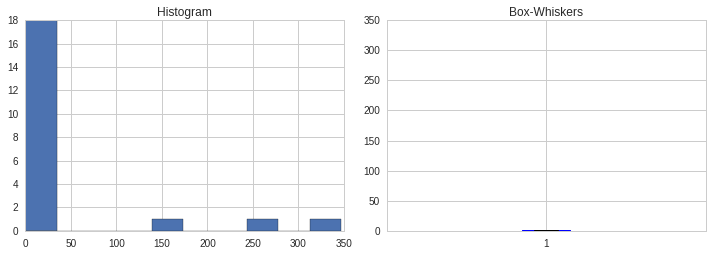

ES_IsCharter
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


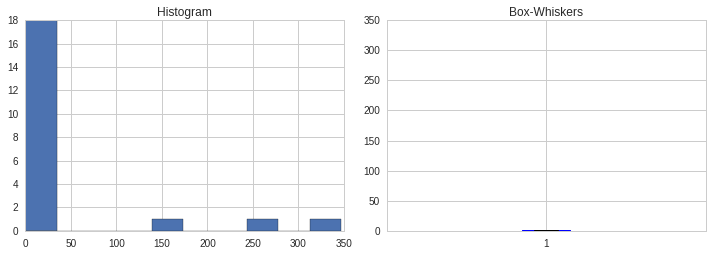

ES_IsMagnet
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


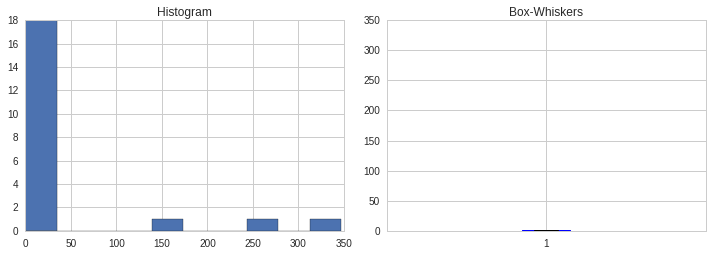

ES_IsTitleI
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


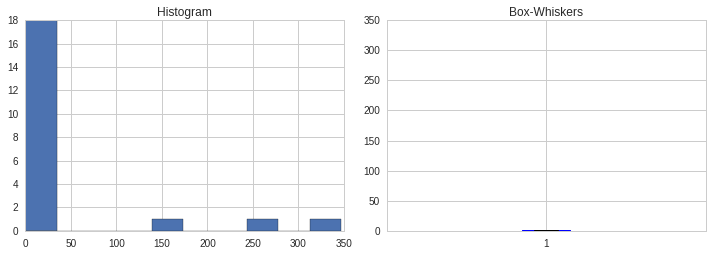

ES_IsVirtual
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


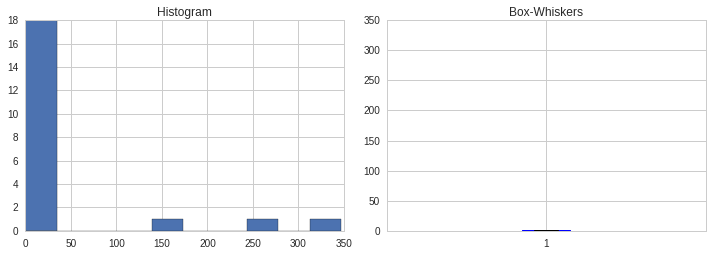

ES_NumFTTeachers
Skew:  2.1
Skew test:  SkewtestResult(statistic=3.7015862947796303, pvalue=0.00021425576122496265)
Kurtosis:  3.331
Kurtosis test:  KurtosistestResult(statistic=2.7568770586278029, pvalue=0.0058356287901138422)
 
PPCC_max value:  7.59


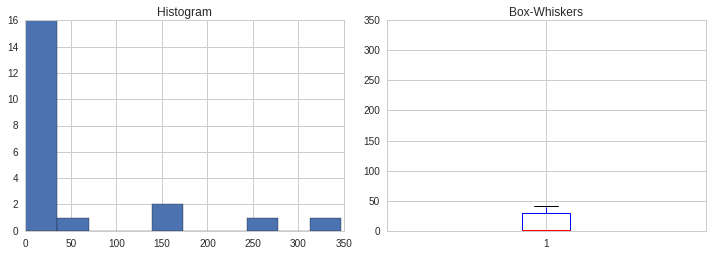

ES_NumStudents
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


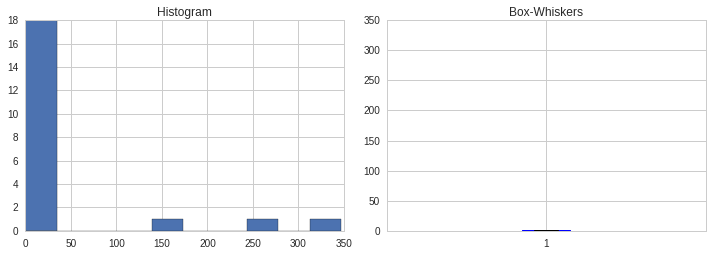

ES_PerTwoOrMoreRaces
Skew:  1.098
Skew test:  SkewtestResult(statistic=2.2699498207916022, pvalue=0.023210627786409709)
Kurtosis:  0.806
Kurtosis test:  KurtosistestResult(statistic=1.3938632250535004, pvalue=0.1633589112669861)
 
PPCC_max value:  -0.07


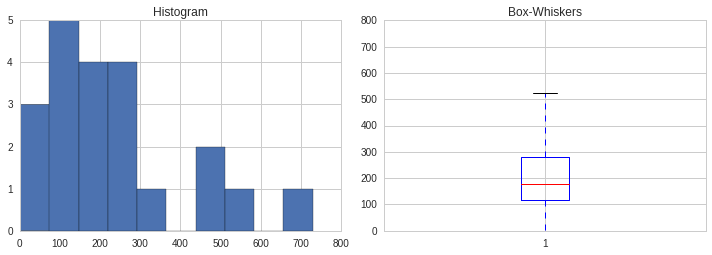

ES_Rank
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


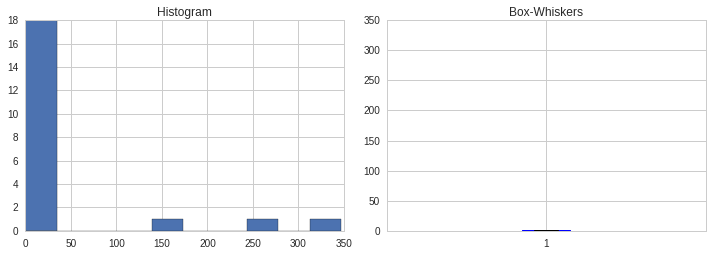

ES_SDStarRating
Skew:  2.474
Skew test:  SkewtestResult(statistic=4.1154152796779373, pvalue=3.8648293799580699e-05)
Kurtosis:  4.781
Kurtosis test:  KurtosistestResult(statistic=3.213049125853721, pvalue=0.0013133382362128623)
 
PPCC_max value:  11.117


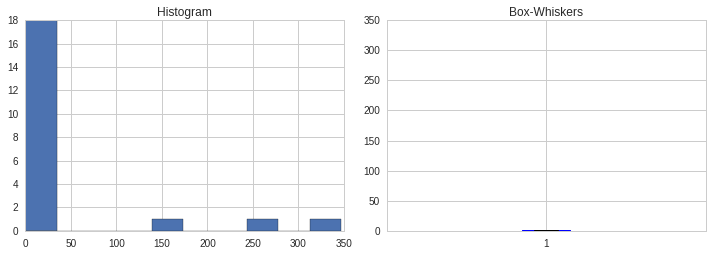

ES_StudentTeachRatio
Skew:  2.1
Skew test:  SkewtestResult(statistic=3.7015862947796303, pvalue=0.00021425576122496265)
Kurtosis:  3.331
Kurtosis test:  KurtosistestResult(statistic=2.7568770586278029, pvalue=0.0058356287901138422)
 
PPCC_max value:  7.59


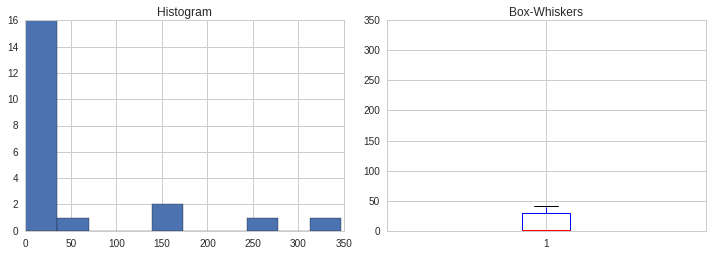

HS_AvgStandardScore
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


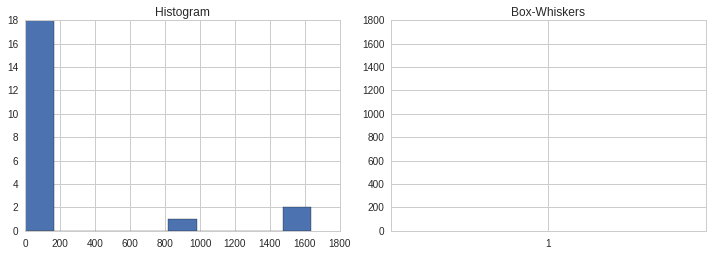

HS_IsCharter
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


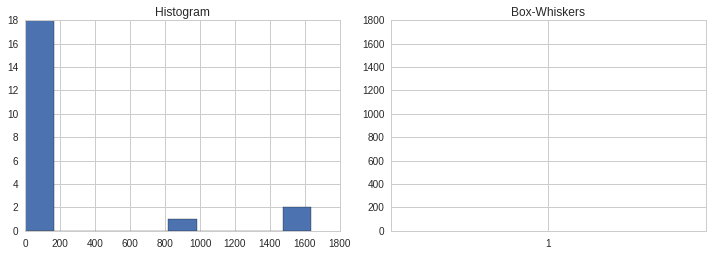

HS_IsMagnet
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


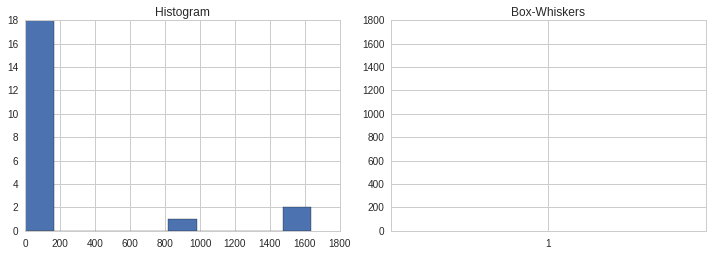

HS_IsTitleI
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


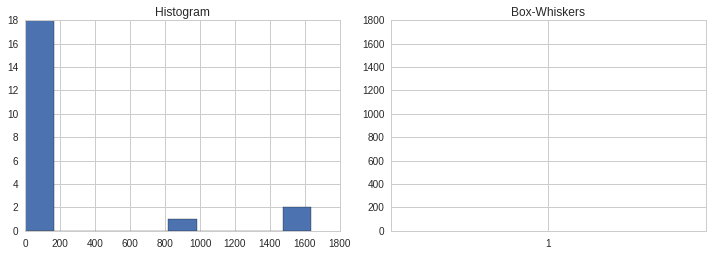

HS_IsVirtual
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


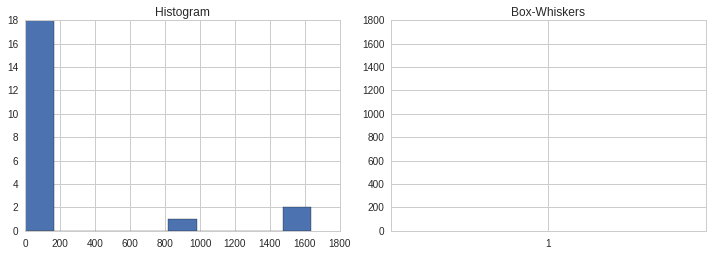

HS_NumFTTeachers
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


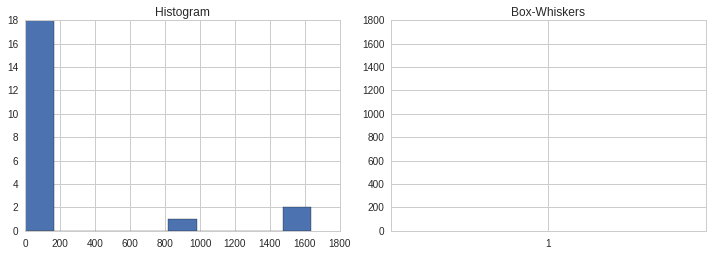

HS_NumStudents
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


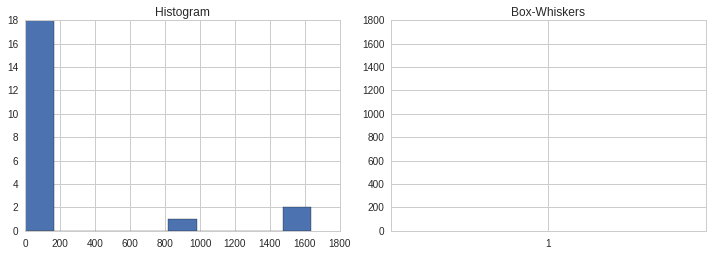

HS_PerTwoOrMoreRaces
Skew:  1.956
Skew test:  SkewtestResult(statistic=3.5278628547904458, pvalue=0.00041892914726719558)
Kurtosis:  2.752
Kurtosis test:  KurtosistestResult(statistic=2.5281044519451714, pvalue=0.011468022811144948)
 
PPCC_max value:  6.662


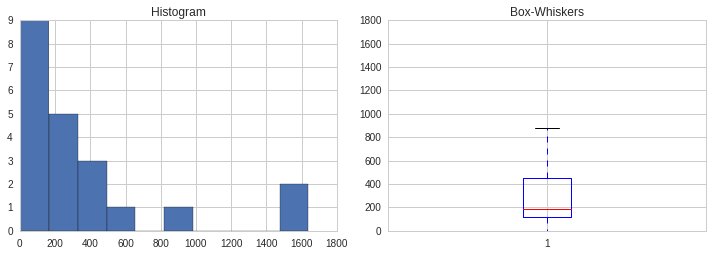

HS_Rank
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


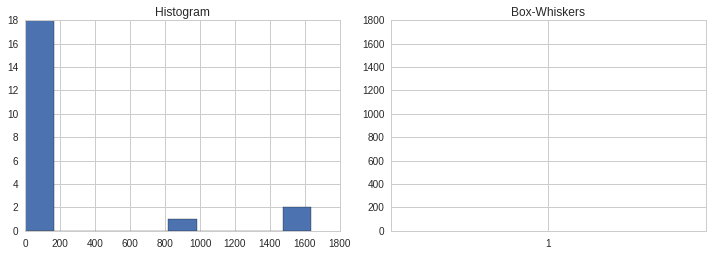

HS_SDStarRating
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


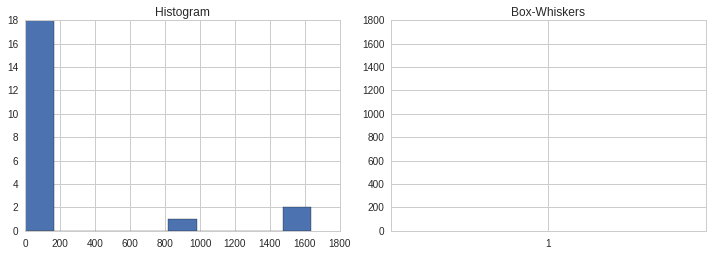

HS_StudentTeachRatio
Skew:  2.299
Skew test:  SkewtestResult(statistic=3.927790698305758, pvalue=8.5729767721709236e-05)
Kurtosis:  3.57
Kurtosis test:  KurtosistestResult(statistic=2.8420936793523865, pvalue=0.004481832006846335)
 
PPCC_max value:  10.006


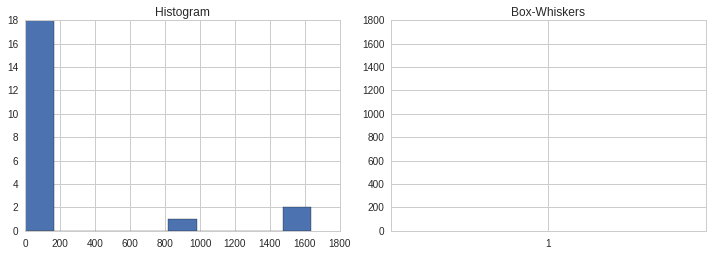

MS_AvgStandardScore
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


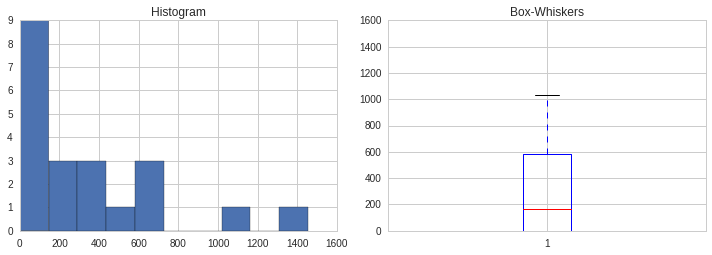

MS_IsCharter
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


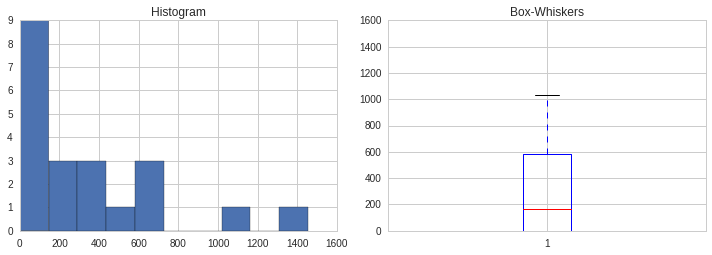

MS_IsMagnet
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


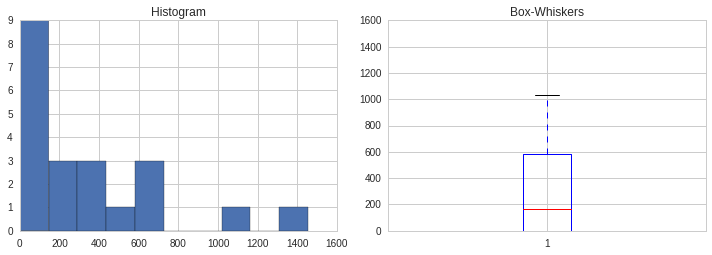

MS_IsTitleI
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


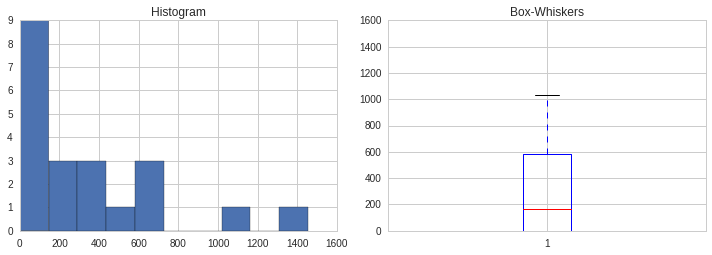

MS_IsVirtual
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


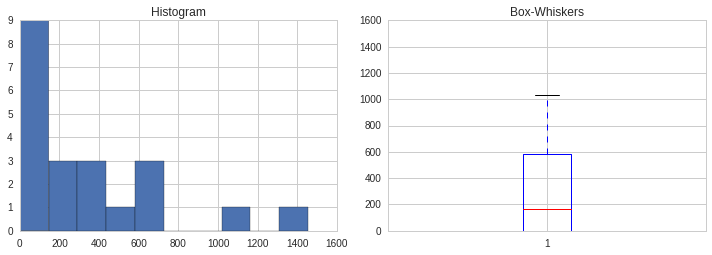

MS_NumFTTeachers
Skew:  1.341
Skew test:  SkewtestResult(statistic=2.6702313251337966, pvalue=0.007579900639631475)
Kurtosis:  1.289
Kurtosis test:  KurtosistestResult(statistic=1.7503951547619176, pvalue=0.080050151513160764)
 
PPCC_max value:  3.679


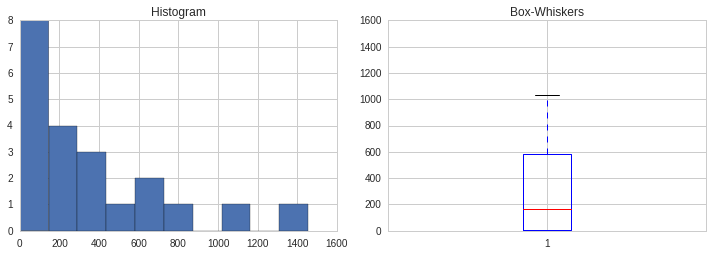

MS_NumStudents
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


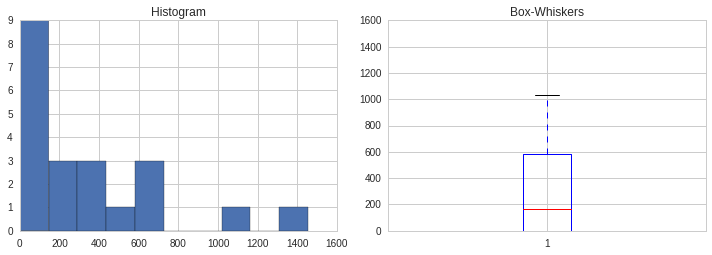

MS_PerTwoOrMoreRaces
Skew:  1.6
Skew test:  SkewtestResult(statistic=3.0556018213281888, pvalue=0.0022460932346655272)
Kurtosis:  2.132
Kurtosis test:  KurtosistestResult(statistic=2.2407491694786081, pvalue=0.025042327182445867)
 
PPCC_max value:  5.895


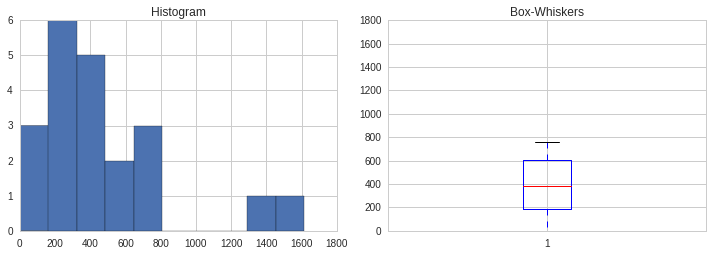

MS_Rank
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


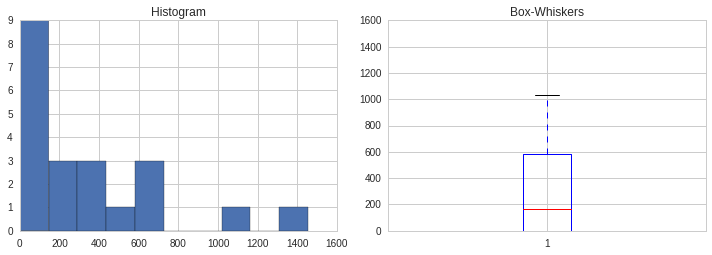

MS_SDStarRating
Skew:  1.33
Skew test:  SkewtestResult(statistic=2.6529328112376573, pvalue=0.0079795752828574398)
Kurtosis:  1.205
Kurtosis test:  KurtosistestResult(statistic=1.6930829648868417, pvalue=0.090439676346414935)
 
PPCC_max value:  3.46


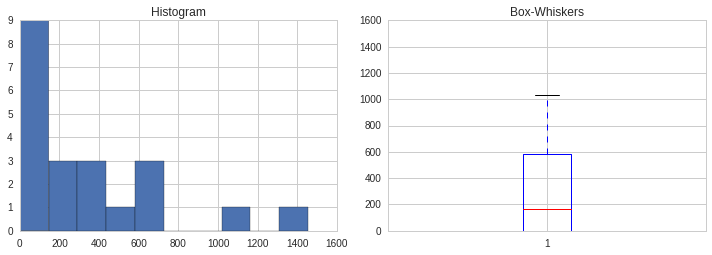

MS_StudentTeachRatio
Skew:  1.341
Skew test:  SkewtestResult(statistic=2.6702313251337966, pvalue=0.007579900639631475)
Kurtosis:  1.289
Kurtosis test:  KurtosistestResult(statistic=1.7503951547619176, pvalue=0.080050151513160764)
 
PPCC_max value:  3.679


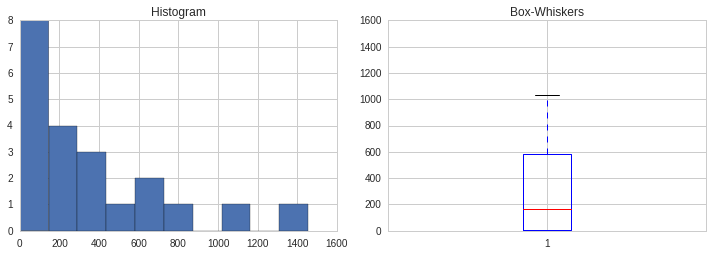

Zip
Skew:  0.0
Skew test:  SkewtestResult(statistic=1.0405138312703222, pvalue=0.29810124151594375)
Kurtosis:  -3.0
Kurtosis test:  KurtosistestResult(statistic=0.0, pvalue=1.0)
 
PPCC_max value:  42.361


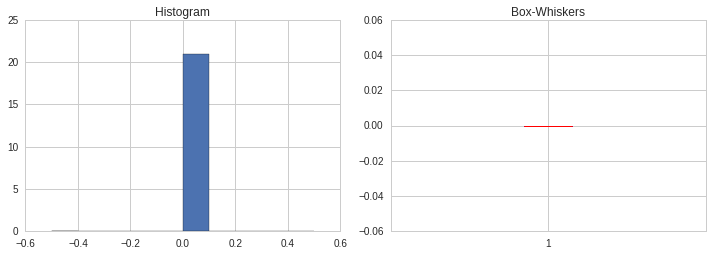

In [30]:
# Histogram and Box-Whiskers plot to see if there are sample imbalances

for i in df_zip_combined_3.iloc[:,:]:
    print(i) 
    print("Skew: ", round(skew(df_zip_combined_3.iloc[:,:][i]),3))
    print("Skew test: ", skewtest(df_zip_combined_3.iloc[:,:][i]))
    print("Kurtosis: ", round(kurtosis(df_zip_combined_3.iloc[:,:][i]),3))
    print("Kurtosis test: ", kurtosistest(df_zip_combined_3.iloc[:,:][i]))
    print(" ")
    print("PPCC_max value: ", round(ppcc_max(df_zip_combined_3.iloc[:,:][i], brack = (-10,10)),3))
    #www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm
    #ppcc_max~0.14 indicates a normal distribution. Less than 0.14 indicates
    #long-tailed distributions (Cauchy).
    #Greater than 0.14 indicates short-tailed distributions (Beta or uniform).
    
    plt.figure(1, figsize = (10,10), dpi = 80)
    #histogram plot
    plt.subplot(321)
    plt.title("Histogram")
    plt.hist(df_zip_combined_3.iloc[:,:][i])
    
    #box and whiskers plot 
    plt.subplot(322)
    plt.title("Box-Whiskers")
    plt.boxplot(df_zip_combined_3.iloc[:,:][i])   
    
    plt.tight_layout()
    plt.show()

#### There is some consistency of how the missing values are distributed as a function of zipcode. This means that dropping nans will create some imbalance. A couple of zipcodes are missing ~1400 values, while other zipcodes are missing < 500 values. The imbalance will be more pronounced for the HS and MS PerTwoOrMoreRaces feature. Hence dropping the PerTwoOrMoreRaces columns before dropping nans.

#### Dropping missing data from dataset

In [31]:
# Export data to csv and plot out with folium location of properties to see
# general geographic distribution

In [32]:
# Drop specific columns and empty/nan data
df_4 = df_3.drop(u'ES_PerTwoOrMoreRaces', axis=1)
df_4 = df_4.drop(u'HS_PerTwoOrMoreRaces', axis=1)
df_4 = df_4.drop(u'MS_PerTwoOrMoreRaces', axis=1)
df_4 = df_4.dropna(axis=0, how='any')

In [33]:
# Dropping specific columns since they are not needed for present analysis/performing cleanup.
df_4 = df_4.drop(u'field1', axis = 1)
df_4 = df_4.drop(u'Stat', axis = 1)
df_4 = df_4.drop(u'ML#', axis = 1)
df_4 = df_4.drop(u'Address', axis = 1)
df_4 = df_4.drop(u'IndexMonth', axis = 1)
df_4 = df_4.drop(u'IndexMonth_CloseDate', axis = 1)
df_4 = df_4.drop(u'IndexMonth2', axis = 1)
df_4 = df_4.drop(u'IndexMonth_ListDate', axis = 1)
df_4 = df_4.drop(u'IndexYear_CloseDate', axis = 1)
df_4 = df_4.drop(u'IndexYear_ListDate', axis = 1)
df_4 = df_4.drop(u'IndexMonth_No_CloseDate', axis = 1)
df_4 = df_4.drop(u'IndexMonth_No_ListDate', axis = 1)

In [34]:
df_4.head()

,ListPrice2,ClosePrice2,Bedrooms,BathsFull,BathsHalf,Levels,Fireplaces,BasementY/N,Acres,YearBuilt,...,distance_public_school_mid_km,distance_public_school_special_ed_km,distance_public_school_ye_km,CloseDate_dt_year,CloseDate_dt_month,CloseDate_dt_day,ListDate_dt_year,ListDate_dt_month,ListDate_dt_day,ListPrice2_delta
10,269900,280000,3,2,0.0,3,0,1,0.082,1950,...,1.838891,7.304442,1.890599,2010,3,26,2010,3,16,-0.118838
13,255000,250000,2,2,1.0,2,1,0,0.000,1987,...,1.471097,5.693556,1.043636,2012,7,11,2012,5,31,-0.153386
20,299900,299900,1,1,0.0,1,0,0,0.000,1941,...,1.286464,6.918005,2.260644,2014,2,27,2014,2,15,-0.161353
43,245000,252000,1,1,0.0,1,0,0,0.000,1941,...,1.286464,6.918005,2.260644,2014,1,24,2014,1,8,-0.310248
60,250000,275000,1,1,0.0,1,0,0,0.000,1891,...,1.286464,6.918005,2.260644,2014,8,7,2014,8,2,-0.300308


In [35]:
df_4.isnull().sum()

ListPrice2                                    0
ClosePrice2                                   0
Bedrooms                                      0
BathsFull                                     0
BathsHalf                                     0
Levels                                        0
Fireplaces                                    0
BasementY/N                                   0
Acres                                         0
YearBuilt                                     0
DOMP                                          0
TotalTaxes2                                   0
TaxTotalLivingArea                            0
Zip                                           0
SaleCount                                     0
MedianValuePerSqft                            0
PctOfHomesDecreasingInValues                  0
PctOfHomesIncreasingInValues                  0
Turnover                                      0
PriceIndex                                    0
FreddieMac15yr                          

In [36]:
df_4.describe()

,ListPrice2,ClosePrice2,Bedrooms,BathsFull,BathsHalf,Levels,Fireplaces,BasementY/N,Acres,YearBuilt,...,distance_public_school_mid_km,distance_public_school_special_ed_km,distance_public_school_ye_km,CloseDate_dt_year,CloseDate_dt_month,CloseDate_dt_day,ListDate_dt_year,ListDate_dt_month,ListDate_dt_day,ListPrice2_delta
count,1.372500e+04,1.372500e+04,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,...,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000
mean,6.343952e+05,6.227699e+05,2.767650,1.973115,0.480000,2.398470,0.615665,0.543825,0.053930,1943.689035,...,1.376025,7.988205,2.910742,2012.302951,6.840729,18.110383,2012.180546,6.674098,16.046485,0.187952
std,6.706850e+05,6.278060e+05,1.431167,1.033435,0.601281,1.210977,0.944914,0.498094,0.081397,32.596375,...,0.808438,3.118003,1.605334,1.365305,3.191040,9.323807,1.402173,3.127608,8.747329,0.915338
min,1.490000e+04,1.600000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1776.000000,...,0.052788,0.060727,0.035250,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,-0.923590
25%,2.890000e+05,2.814000e+05,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1922.000000,...,0.809928,5.796528,1.519380,2011.000000,4.000000,10.000000,2011.000000,4.000000,9.000000,-0.274005
50%,4.650000e+05,4.600000e+05,3.000000,2.000000,0.000000,3.000000,0.000000,1.000000,0.037000,1939.000000,...,1.268460,8.011362,2.690362,2012.000000,7.000000,19.000000,2012.000000,7.000000,16.000000,0.019961
75%,7.800000e+05,7.785000e+05,4.000000,3.000000,1.000000,3.000000,1.000000,1.000000,0.077000,1962.000000,...,1.759276,10.604351,4.270932,2014.000000,10.000000,27.000000,2013.000000,9.000000,23.000000,0.410697
max,2.590000e+07,2.200000e+07,12.000000,11.000000,11.000000,16.000000,14.000000,1.000000,3.579000,2014.000000,...,5.523279,14.222042,7.375628,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,33.882155


In [37]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13725 entries, 10 to 51690
Columns: 106 entries, ListPrice2 to ListPrice2_delta
dtypes: float64(75), int64(31)
memory usage: 11.2 MB


In [38]:
# Export dataframe to csv
df_4.to_csv('df_data_inspection_cleaning_output.csv')

### Analysis/Visualization continued in EDA script